In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
os.chdir("C:/Users/Dell/BusinessAnalyst/2.Credit_card")
os.getcwd()

'C:\\Users\\Dell\\BusinessAnalyst\\2.Credit_card'

In [3]:
data = pd.read_csv("Credit_card.csv")
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.shape

(8950, 18)

# Missing Value Analysis

In [5]:
missing_value = pd.DataFrame(data.isnull().sum())
missing_value

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


#### Here there are 313 missing values in MINIMUM_PAYMENTS variable and 1 missing value in CREDIT_LIMIT variable

In [6]:
data = data.dropna(axis =0)

#### We drop null values rows as it is very minimum of the dataset . i.e., 8950 - 314 = 8636.

In [7]:
data.shape

(8636, 18)

In [8]:
missing_value = pd.DataFrame(data.isnull().sum())
missing_value

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


#### We dont have any Missing value.

### Lets look at clients with different ways of purchases.

In [9]:
purchase1 = data[(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] == 0)]
a = purchase1.shape
print("Total Number of Clients with No Purchase is : ", str(a[0]))

Total Number of Clients with No Purchase is :  1965


In [10]:
purchase2 = data[(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] > 0)]
b = purchase2.shape
print("Total Number of Clients with both Purchases are : ", str(b[0]))

Total Number of Clients with both Purchases are :  2741


In [11]:
purchase3 = data[(data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] == 0)]
c = purchase3.shape
print("Total Number of Clients who use only ONEOFF Purchase but not INSTALLMENT Purchase is : ", str(c[0]))

Total Number of Clients who use only ONEOFF Purchase but not INSTALLMENT Purchase is :  1782


In [12]:
purchase4 = data[(data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] > 0)]
d = purchase4.shape
print("Total Number of Clients who use only INSTALLMENT Purchase but not ONEOFF Purchase is : ", str(d[0]))

Total Number of Clients who use only INSTALLMENT Purchase but not ONEOFF Purchase is :  2148


#### By the above Information we can know different types of purchases that client approached.

In [13]:
def purchase(data):
    if (data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] == 0) :
        return 'No purchase'
    if (data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] > 0) :
        return 'Both'
    if (data['ONEOFF_PURCHASES'] > 0) & (data['INSTALLMENTS_PURCHASES'] == 0) :
        return 'OneOff'
    if (data['ONEOFF_PURCHASES'] == 0) & (data['INSTALLMENTS_PURCHASES'] > 0) :
        return 'Installment'

In [14]:
purchase_types = pd.DataFrame()

In [15]:
purchase_types['Types'] = data.apply(purchase, axis = 1)

In [16]:
purchase_types.head(10)

,Types
0,Installment
1,No purchase
2,OneOff
4,OneOff
5,Installment
6,Both
7,Installment
8,Both
9,OneOff
10,Installment


# Outlier Analysis

In [20]:
df = data.copy()

In [18]:
data = data.drop('CUST_ID',axis = 1)

BALANCE


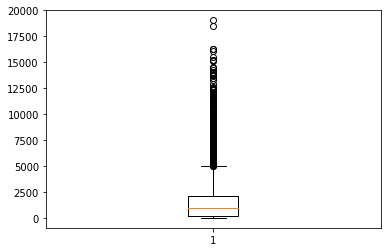

BALANCE_FREQUENCY


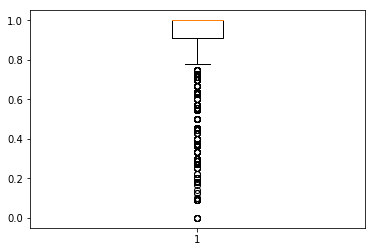

PURCHASES


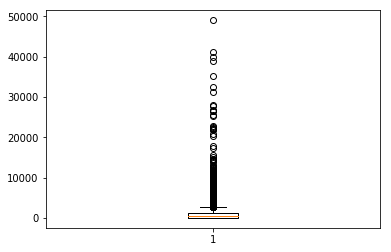

ONEOFF_PURCHASES


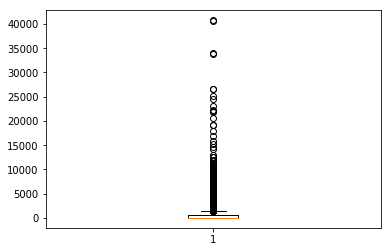

INSTALLMENTS_PURCHASES


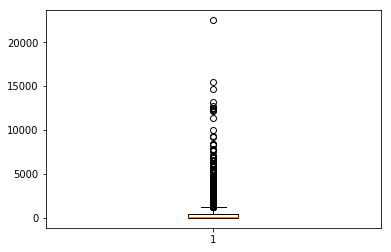

CASH_ADVANCE


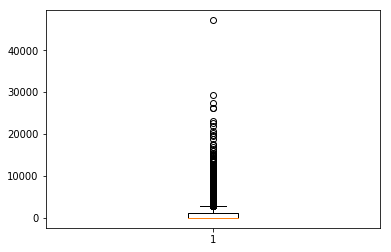

PURCHASES_FREQUENCY


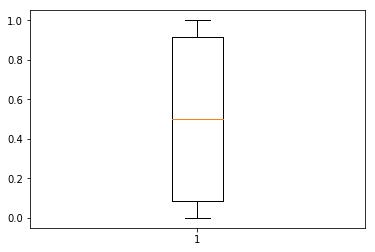

ONEOFF_PURCHASES_FREQUENCY


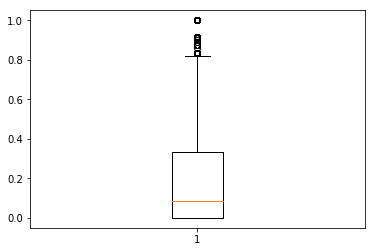

PURCHASES_INSTALLMENTS_FREQUENCY


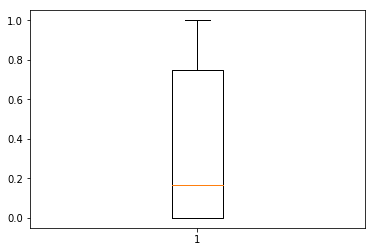

CASH_ADVANCE_FREQUENCY


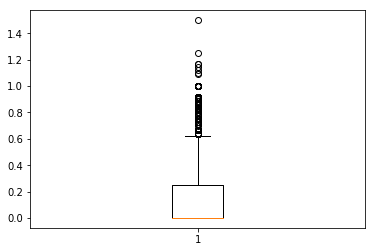

CASH_ADVANCE_TRX


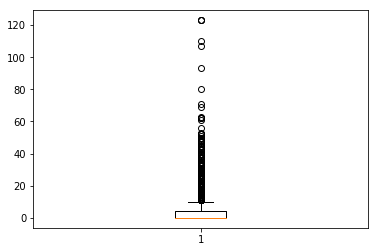

PURCHASES_TRX


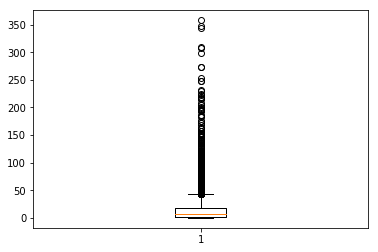

CREDIT_LIMIT


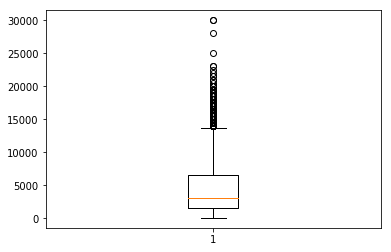

PAYMENTS


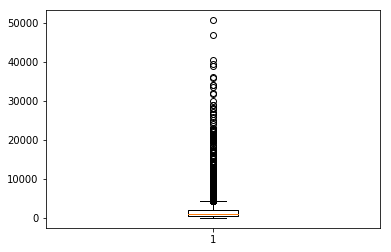

MINIMUM_PAYMENTS


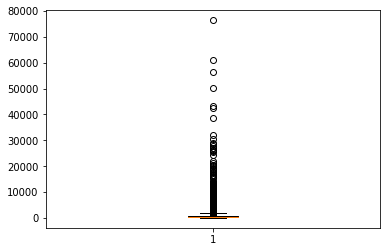

PRC_FULL_PAYMENT


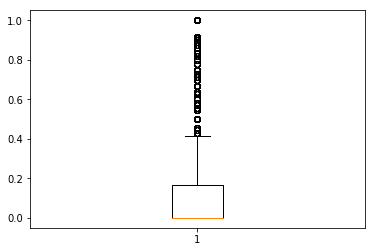

TENURE


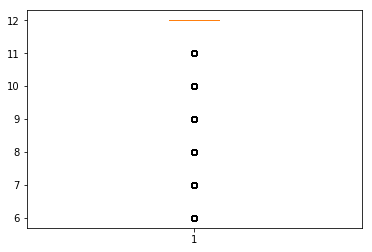

In [21]:
#plotting boxplot
%matplotlib inline
for i in df:
    print(i)
    plt.boxplot(df[i])
    plt.show()

In [22]:
cnames = data.columns
cnames

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [23]:
#detect and delete outliers
def removeOutliers(data, cnames):
    for i in cnames:
        print(i)
        q75, q25 = np.percentile(data.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min=q25 - (iqr*1.5)
        max=q75 + (iqr*1.5)
    
        data = data.drop(data[data.loc[:,i]<min].index)
        data = data.drop(data[data.loc[:,i]>max].index)
    return data

In [24]:
df = removeOutliers(df, cnames)

BALANCE
BALANCE_FREQUENCY
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT
TENURE


In [25]:
df.shape

(1978, 17)

#### Outliers are removed.

# Feature Selection

In [26]:
#correlation analysis, plot
df_corr = data.loc[:, cnames]

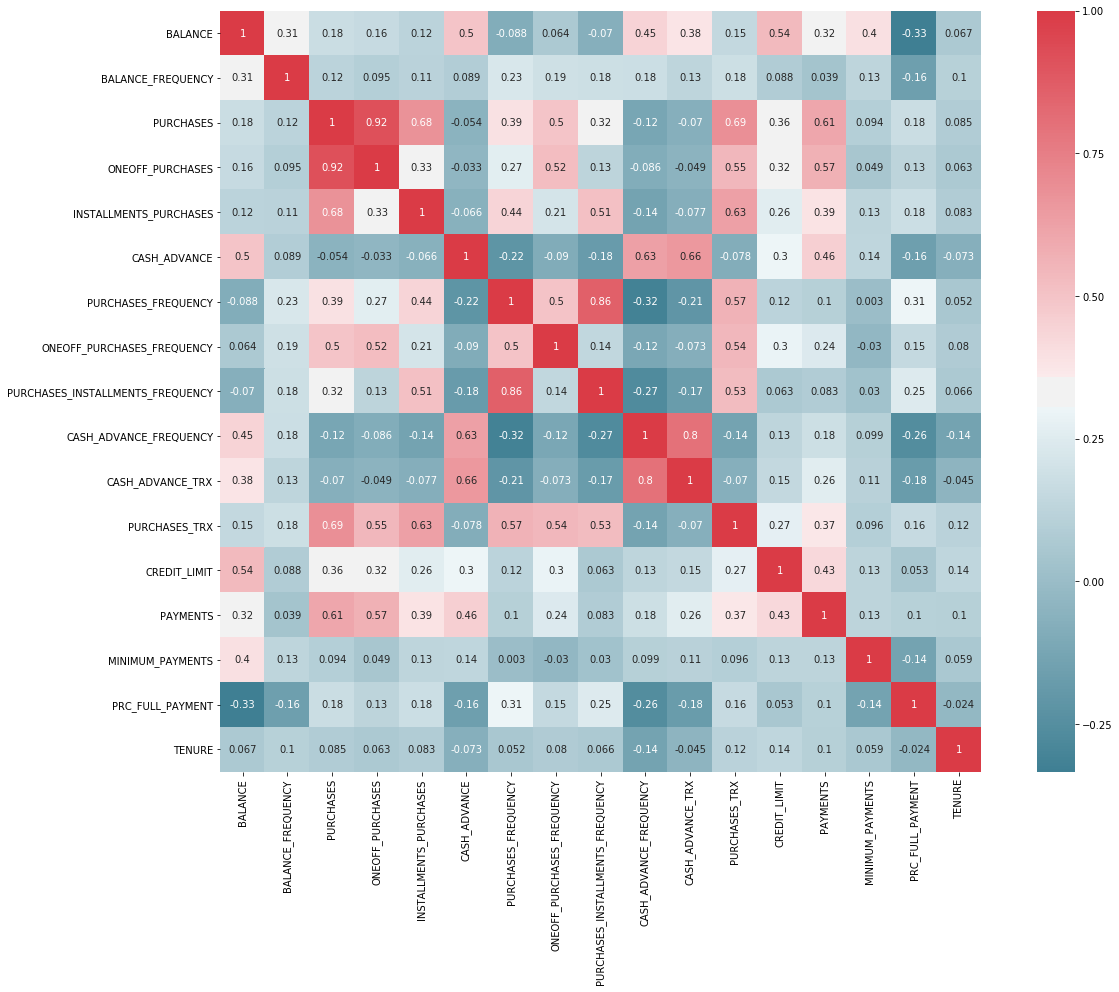

In [27]:
#set the width and height of plot
f, ax = plt.subplots(figsize=(20,14))

#generate correlation
corr = df_corr.corr()

#plot using seaborn
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, annot = True, ax=ax)

In [28]:
for row in corr:
    for col in corr:
        if row != col:
            if corr[row][col] > 0.85:
                print(row, '-', col, '=', corr[row][col])
            

PURCHASES - ONEOFF_PURCHASES = 0.9167802242554735
ONEOFF_PURCHASES - PURCHASES = 0.9167802242554735
PURCHASES_FREQUENCY - PURCHASES_INSTALLMENTS_FREQUENCY = 0.8623379116139267
PURCHASES_INSTALLMENTS_FREQUENCY - PURCHASES_FREQUENCY = 0.8623379116139267


#### Highly positively correlated columns that are more than 0.85
     PURCHASES - ONEOFF_PURCHASES
     PURCHASES_FREQUENCY - PURCHASES_INSTALLMENTS_FREQUENCY     
#### Since ONEOFF_PURCHASES is highly correlated among these pairs, we will drop that variable

In [29]:
df = df.drop('ONEOFF_PURCHASES',axis =1)

# Feature Scaling

In [30]:
data1=data.copy()

BALANCE


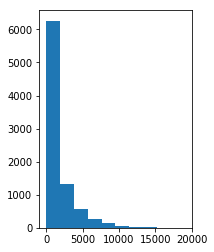

BALANCE_FREQUENCY


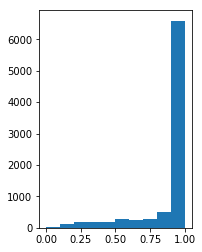

PURCHASES


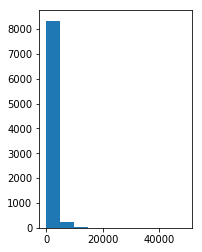

ONEOFF_PURCHASES


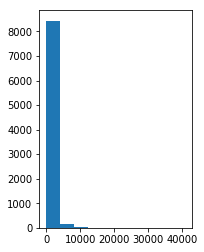

INSTALLMENTS_PURCHASES


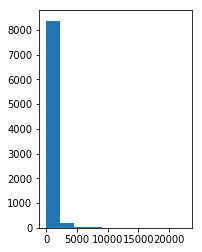

CASH_ADVANCE


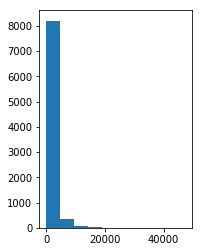

PURCHASES_FREQUENCY


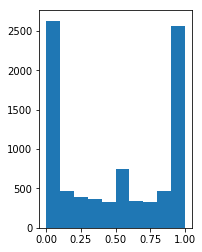

ONEOFF_PURCHASES_FREQUENCY


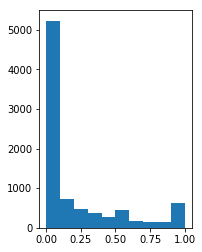

PURCHASES_INSTALLMENTS_FREQUENCY


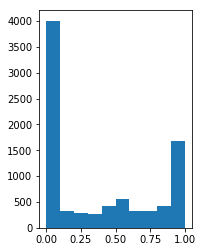

CASH_ADVANCE_FREQUENCY


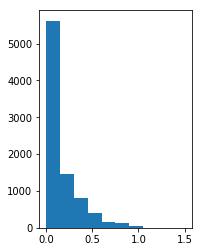

CASH_ADVANCE_TRX


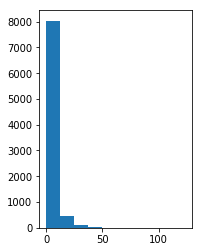

PURCHASES_TRX


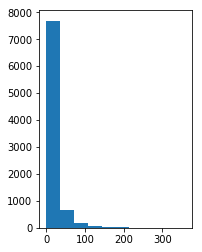

CREDIT_LIMIT


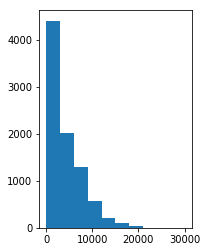

PAYMENTS


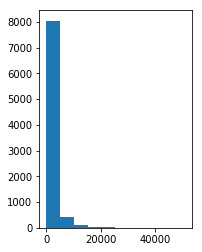

MINIMUM_PAYMENTS


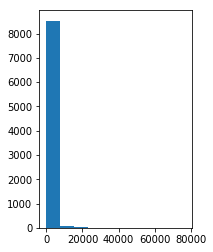

PRC_FULL_PAYMENT


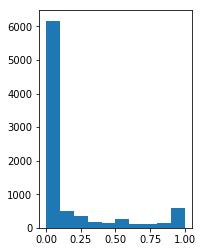

TENURE


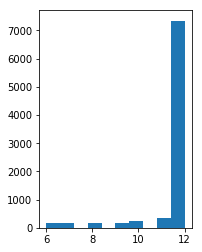

In [31]:
#checking for normality

for i in cnames:
    print(i)
    plt.subplot(1, 2, 2)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
    plt.hist(data[i])
    plt.show()

#### Since the values are continuous we use Normalisation

In [32]:
cnames = data.iloc[:,0:16].columns

In [33]:
#normalisation
for i in cnames:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [34]:
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,12
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,12
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,12
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,12
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,12


#### Here all the values are in the range between 0 to 1

# K means Clustering

In [35]:
from sklearn.cluster import KMeans

#estimating the number of clusters
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(data.iloc[:,0:16])
    cluster_errors.append(clusters.inertia_)

In [36]:
#create a dataframe with cluster errors
cluster_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors":cluster_errors})

Text(0,0.5,'Errors')

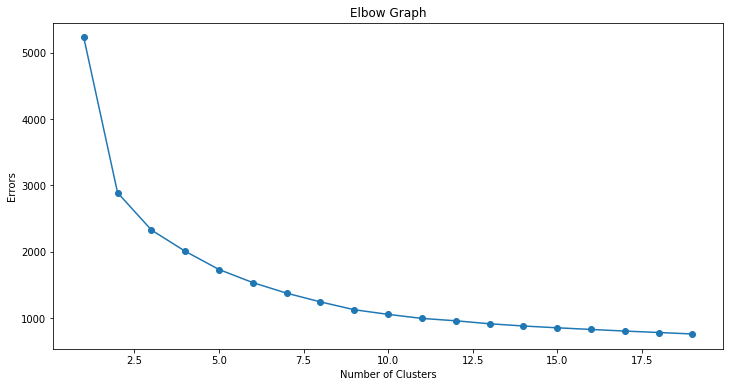

In [37]:
#plot line chart to visualise number of clusters
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(cluster_df.num_clusters, cluster_df.cluster_errors, marker = "o")
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('Errors')

In [38]:
#implementing kmenas
kmeans_model = KMeans(n_clusters = 3).fit(data)

0    4300
1     708
2    3628
Name: cluster, dtype: int64


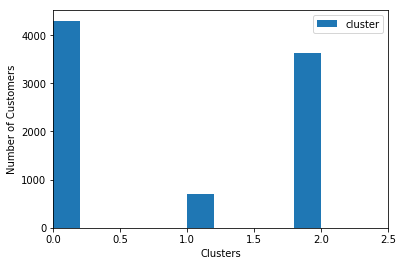

In [39]:
data1['cluster'] = kmeans_model.labels_

ax = data1['cluster'].plot(kind='hist')

# Set the x-axis label
ax.set_xlabel("Clusters")
plt.xlim(0,2.5)
# Set the y-axis label
ax.set_ylabel("Number of Customers")
ax.legend()
print(data1['cluster'].value_counts().sort_index())

#### Hence, There are 4300 customers who belong to Cluster 0. 
#### 708 customers who belong to Cluster 1.
#### 3628 customers who belong to Cluster 2.
### Therefore, we can observe the customers behavior and define marketing strategy

### DONE